In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
predictions = np.load(
    "../data/predictions/baseline_predictions_2024-01-11_11-39-29.npz"
)

X_test = predictions["X_test"]
y_test = predictions["y_test"]
y_pred = predictions["y_pred"]


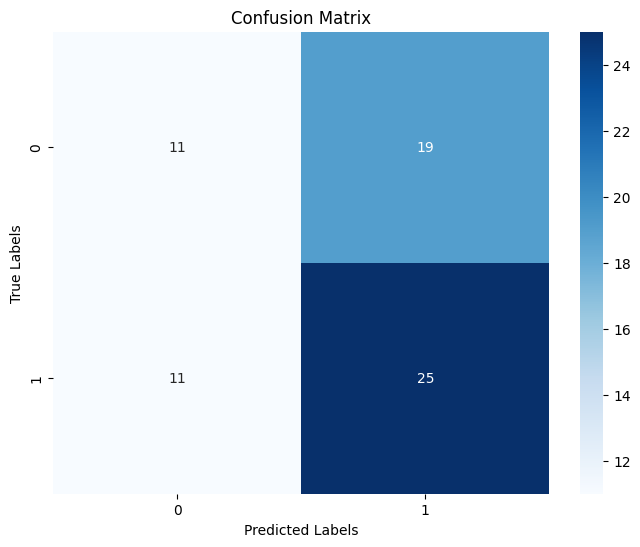

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Performance is quite poor for this baseline model. Need to investigate why there is so much bias towards positive treatment labelling.

In [12]:
error_analysis_df = pd.DataFrame(
    {"Actual": y_test, "Predicted": y_pred, "Correct": y_test == y_pred}
)

incorrect_predictions = error_analysis_df[error_analysis_df["Correct"] == False]
X_test = pd.DataFrame(X_test)
incorrect_predictions = incorrect_predictions.reset_index(drop=True)
incorrect_analysis_df = pd.concat([incorrect_predictions, X_test], axis=1)

incorrect_analysis_df.head()


,Actual,Predicted,Correct,0,1,2,3,4,5,6,...,28,29,30,31,32,33,34,35,36,37
0,False,True,False,-2.149438,-1.734974,0.228324,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,True,False,False,-2.633209,-2.859442,-0.966957,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,True,False,False,-0.214357,0.112366,0.586909,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,False,True,False,-1.278652,-1.574336,-0.329474,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,False,True,False,-0.601374,-1.494017,0.825965,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


One hot encodings are stored as floats, not an arrays, need to revise the data